<a href="https://colab.research.google.com/github/vaishnashan/NLP/blob/main/sms_spam__Word2vec_And_AvgWord2vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# spam classification
# Text preprocessing
  1. Tokenization
  2. stopwords
  3. stemming
  4. lemmatization

# Text to vectors
  1. Bow
  2. TF-IDF
  3. word2vec

In [34]:
# importing the Dataset

import pandas as pd

messages = pd.read_csv("/content/SMSSpamCollection", sep='\t',
                           names=["label", "message"])

In [35]:
messages

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [38]:
messages.shape

(5572, 2)

In [39]:
messages['message'].loc[0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [40]:
#Data cleaning and preprocessing
# Tokenization,stopwords,stemming using NLTK
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
ps = PorterStemmer()

In [42]:
len(messages)

5572

In [43]:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [44]:
type(corpus)

list

In [45]:
len(corpus)

5572

In [46]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

# BoW

In [ ]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [47]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [48]:
X[0]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X.shape

(5572, 2500)

In [50]:
y=pd.get_dummies(messages['label'])
y=y.iloc[:,1].values

In [51]:
y

array([False, False,  True, ..., False, False, False])

In [ ]:
y.shape

(5572,)

In [54]:
y[0]

False

In [56]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [57]:
# Importing the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.2f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       955
        True       1.00      0.88      0.93       160

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
[[955   0]
 [ 20 140]]


In [83]:
# Creating the TFIDF model
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()

In [84]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [59]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


Accuracy Score: 0.9847533632286996
Confusion Matrix:
 [[955   0]
 [ 17 143]]


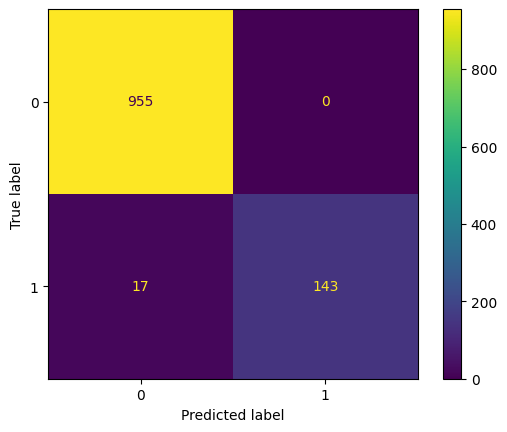

In [61]:
# Importing necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Training the Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=0)
random_forest_model.fit(X_train, y_train)

# Prediction
y_pred = random_forest_model.predict(X_test)

# Accuracy Score
score = accuracy_score(y_test, y_pred)
print("Accuracy Score:", score)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


## Word2vec Implementation

In [85]:
# Step 1: Install Required Libraries
!pip install gensim nltk

# Step 2: Import Necessary Libraries
import re
import gensim
import numpy as np
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize
from gensim.utils import simple_preprocess

# Step 3: Download Required Data
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [86]:
# Step 4: Load Pretrained Word2Vec Model
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')  # Loads the 300-dimensional Google News Word2Vec model

In [87]:
# Example: Retrieve Vector for 'king'
vec_king = wv['king']
print("Vector for 'king':", vec_king)


Vector for 'king': [ 1.25976562e-01  2.97851562e-02  8.60595703e-03  1.39648438e-01
 -2.56347656e-02 -3.61328125e-02  1.11816406e-01 -1.98242188e-01
  5.12695312e-02  3.63281250e-01 -2.42187500e-01 -3.02734375e-01
 -1.77734375e-01 -2.49023438e-02 -1.67968750e-01 -1.69921875e-01
  3.46679688e-02  5.21850586e-03  4.63867188e-02  1.28906250e-01
  1.36718750e-01  1.12792969e-01  5.95703125e-02  1.36718750e-01
  1.01074219e-01 -1.76757812e-01 -2.51953125e-01  5.98144531e-02
  3.41796875e-01 -3.11279297e-02  1.04492188e-01  6.17675781e-02
  1.24511719e-01  4.00390625e-01 -3.22265625e-01  8.39843750e-02
  3.90625000e-02  5.85937500e-03  7.03125000e-02  1.72851562e-01
  1.38671875e-01 -2.31445312e-01  2.83203125e-01  1.42578125e-01
  3.41796875e-01 -2.39257812e-02 -1.09863281e-01  3.32031250e-02
 -5.46875000e-02  1.53198242e-02 -1.62109375e-01  1.58203125e-01
 -2.59765625e-01  2.01416016e-02 -1.63085938e-01  1.35803223e-03
 -1.44531250e-01 -5.68847656e-02  4.29687500e-02 -2.46582031e-02
  1.85

# training word2vec from scartch

In [90]:
# Initialize Lemmatizer and Stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Preprocess Messages
corpus = []
for i in range(len(messages['message'])):
    review = re.sub('[^a-zA-Z]', ' ', messages['message'][i])  # Remove special characters
    review = review.lower()  # Convert to lowercase
    review = review.split()  # Tokenize
    review = [lemmatizer.lemmatize(word) for word in review if word not in stop_words]  # Lemmatize and remove stopwords
    corpus.append(' '.join(review))

print("Preprocessed Corpus:", corpus)

Preprocessed Corpus: ['go jurong point crazy available bugis n great world la e buffet cine got amore wat', 'ok lar joking wif u oni', 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply', 'u dun say early hor u c already say', 'nah think go usf life around though', 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv', 'even brother like speak treat like aid patent', 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune', 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour', 'mobile month u r entitled update latest colour mobile camera free call mobile update co free', 'gonna home soon want talk stuff anymore tonight k cried enough today', 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info', 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox

In [91]:
# Step 6: Tokenize Sentences and Prepare Word List
words = []
for sent in corpus:
    sent_tokens = sent_tokenize(sent)  # Sentence tokenization
    for token in sent_tokens:
        words.append(simple_preprocess(token))  # Word tokenization and cleaning

print("Tokenized Words:", words)

Tokenized Words: [['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'great', 'world', 'la', 'buffet', 'cine', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'oni'], ['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'apply'], ['dun', 'say', 'early', 'hor', 'already', 'say'], ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'], ['freemsg', 'hey', 'darling', 'week', 'word', 'back', 'like', 'fun', 'still', 'tb', 'ok', 'xxx', 'std', 'chgs', 'send', 'rcv'], ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'], ['per', 'request', 'melle', 'melle', 'oru', 'minnaminunginte', 'nurungu', 'vettam', 'set', 'callertune', 'caller', 'press', 'copy', 'friend', 'callertune'], ['winner', 'valued', 'network', 'customer', 'selected', 'receivea', 'prize', 'reward', 'claim', 'call', 'claim', 'code', 'kl', 'valid', 'hour'], ['mobile', 'month', 'entitled', 'update', 'late

In [92]:
words

[['go',
  'jurong',
  'point',
  'crazy',
  'available',
  'bugis',
  'great',
  'world',
  'la',
  'buffet',
  'cine',
  'got',
  'amore',
  'wat'],
 ['ok', 'lar', 'joking', 'wif', 'oni'],
 ['free',
  'entry',
  'wkly',
  'comp',
  'win',
  'fa',
  'cup',
  'final',
  'tkts',
  'st',
  'may',
  'text',
  'fa',
  'receive',
  'entry',
  'question',
  'std',
  'txt',
  'rate',
  'apply'],
 ['dun', 'say', 'early', 'hor', 'already', 'say'],
 ['nah', 'think', 'go', 'usf', 'life', 'around', 'though'],
 ['freemsg',
  'hey',
  'darling',
  'week',
  'word',
  'back',
  'like',
  'fun',
  'still',
  'tb',
  'ok',
  'xxx',
  'std',
  'chgs',
  'send',
  'rcv'],
 ['even', 'brother', 'like', 'speak', 'treat', 'like', 'aid', 'patent'],
 ['per',
  'request',
  'melle',
  'melle',
  'oru',
  'minnaminunginte',
  'nurungu',
  'vettam',
  'set',
  'callertune',
  'caller',
  'press',
  'copy',
  'friend',
  'callertune'],
 ['winner',
  'valued',
  'network',
  'customer',
  'selected',
  'receivea',
 

In [93]:

# Step 3: Train Word2Vec Model
# 'words' should be a list of tokenized sentences
model = gensim.models.Word2Vec(sentences=words, window=5, min_count=2, vector_size=100, epochs=10)

# Step 4: Model Information
print("Vocabulary Size:", len(model.wv.index_to_key))  # Total unique words
print("Number of Training Epochs:", model.epochs)
print("Number of Sentences Trained:", model.corpus_count)



Vocabulary Size: 3542
Number of Training Epochs: 10
Number of Sentences Trained: 5564


In [94]:
!pip install tqdm
from tqdm import tqdm

In [96]:
# Step 5: Define Average Word2Vec Function
def avg_word2vec(doc, model):
    """
    Returns the average Word2Vec vector for a document (list of words).
    Ignores words not present in the model's vocabulary.
    """
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key] or [np.zeros(model.vector_size)], axis=0)

# Step 6: Apply Average Word2Vec to All Sentences
X = []  # To store the average vector for each sentence
print("\nComputing Average Word2Vec Vectors:")
for i in tqdm(range(len(words))):
    X.append(avg_word2vec(words[i], model))

# Step 8: Convert to Numpy Array
X_new = np.array(X)

# Step 9: Final Output
print("Shape of Sentence Embeddings:", X_new.shape)  # (Number of sentences, vector_size)




Computing Average Word2Vec Vectors:


100%|██████████| 5564/5564 [00:01<00:00, 5120.39it/s]

Shape of Sentence Embeddings: (5564, 100)


In [99]:
print( X_new[3])

[-8.11163411e-02  3.52782249e-01  7.64691383e-02 -2.97872741e-02
  1.28316939e-01 -6.31691277e-01  1.98073849e-01  8.52227509e-01
 -3.81459832e-01 -2.61693746e-01 -1.66844189e-01 -4.09686238e-01
 -4.60489653e-02  2.08300248e-01  9.73248258e-02 -3.80461901e-01
  2.20121350e-02 -4.94626522e-01  5.74610047e-02 -7.57558048e-01
  2.68052608e-01  1.12823136e-01  1.78763032e-01 -2.19476297e-01
 -2.54452825e-01  2.24279761e-02 -2.55071551e-01 -2.64144987e-01
 -4.86786604e-01  1.26210734e-01  4.56621617e-01  1.10175602e-01
  6.95673004e-03 -2.38768861e-01 -2.05048099e-01  3.50607187e-01
  4.59805019e-02 -2.87412375e-01 -2.86511034e-01 -6.67616308e-01
  2.51321401e-02 -3.76457214e-01 -7.52735585e-02  5.22897288e-04
  4.35648590e-01 -7.72977322e-02 -3.75546426e-01 -2.78472528e-02
  1.41343072e-01  1.84129760e-01  2.35998675e-01 -3.49322468e-01
 -4.19336818e-02 -2.65841875e-02 -2.08971500e-01  1.48783818e-01
  2.15439186e-01 -4.51519154e-02 -4.33767915e-01  1.66464597e-02
  1.72494248e-01  2.97906